# Generate Table of Statistics for the Paper

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sys.path.append('../src')

In [3]:
import utils
import model_selection
import models
import plotting 
import delong
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PowerTransformer

In [4]:
# read data
all_data = utils.load_unformatted_data('../data/retrospective_influenza_dataset/20191105 resp data no filter revised 1 2020.csv', '../data/retrospective_influenza_dataset/Sample_key_csv revised 1 2020.csv')
all_data = utils.map_label_column(all_data)
all_data, flu_mapping, subtype_mapping = utils.encode_labels(all_data)

# drop zero cols
all_data = all_data.loc[:, all_data.any()]
col_names = all_data.columns[:-2]

# train test split
train, test = utils.train_test_split(all_data, test_size=50)

In [5]:
all_data.subtype.value_counts()

3    118
2     43
1     39
0     36
Name: subtype, dtype: int64

In [6]:
len(all_data)

236

In [7]:
len(all_data.columns)

3368

In [8]:
len(test)

50

In [9]:
len(train)

186

In [10]:
train.flu.value_counts()

1    94
0    92
Name: flu, dtype: int64

In [11]:
test.flu.value_counts()

0    26
1    24
Name: flu, dtype: int64

In [12]:
flu_mapping

{'Flu': 1, 'negative': 0}

In [13]:
# split into data
X_train, y_train = utils.df_to_array(train)
X_test, y_test = utils.df_to_array(test)


In [14]:
#processor = utils.CustomPreprocessor(transforms = ['clip', 'noise', 'power'])
#processor = utils.CustomPreprocessor(transforms = ['standard'])
processor = utils.CustomPreprocessor(transforms = ['quantile'])
processor.fit(X_train)
norm_X_train = processor.transform(X_train)
norm_X_test = processor.transform(X_test)

n_quantiles (1000) is greater than the total number of samples (186). n_quantiles is set to n_samples.


# Train all Models

Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    0.2s remaining:    0.0s


Fitting 4 folds for each of 100 candidates, totalling 400 fits
[CV] max_depth=2, min_samples_split=2, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=2, n_estimators=4, score=0.638, total=   0.0s
[CV] max_depth=2, min_samples_split=2, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=2, n_estimators=4, score=0.745, total=   0.0s
[CV] max_depth=2, min_samples_split=2, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=2, n_estimators=4, score=0.783, total=   0.0s
[CV] max_depth=2, min_samples_split=2, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=2, n_estimators=4, score=0.783, total=   0.0s
[CV] max_depth=2, min_samples_split=2, n_estimators=16 ...............
[CV]  max_depth=2, min_samples_split=2, n_estimators=16, score=0.681, total=   0.0s
[CV] max_depth=2, min_samples_split=2, n_estimators=16 ...............
[CV]  max_depth=2, min_samples_split=2, n_estimators=16, score=0.745, total=   0.0s
[CV] max_de

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=2, n_estimators=64, score=0.935, total=   0.1s
[CV] max_depth=2, min_samples_split=2, n_estimators=64 ...............
[CV]  max_depth=2, min_samples_split=2, n_estimators=64, score=0.913, total=   0.1s
[CV] max_depth=2, min_samples_split=2, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=2, n_estimators=256, score=0.766, total=   0.4s
[CV] max_depth=2, min_samples_split=2, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    1.0s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=2, n_estimators=256, score=0.851, total=   0.4s
[CV] max_depth=2, min_samples_split=2, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=2, n_estimators=256, score=0.891, total=   0.4s
[CV] max_depth=2, min_samples_split=2, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    1.8s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=2, n_estimators=256, score=0.891, total=   0.4s
[CV] max_depth=2, min_samples_split=4, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=4, n_estimators=4, score=0.787, total=   0.0s
[CV] max_depth=2, min_samples_split=4, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=4, n_estimators=4, score=0.851, total=   0.0s
[CV] max_depth=2, min_samples_split=4, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=4, n_estimators=4, score=0.848, total=   0.0s
[CV] max_depth=2, min_samples_split=4, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=4, n_estimators=4, score=0.848, total=   0.0s
[CV] max_depth=2, min_samples_split=4, n_estimators=16 ...............
[CV]  max_depth=2, min_samples_split=4, n_estimators=16, score=0.681, total=   0.0s
[CV] max_depth=2, min_samples_split=4, n_estimators=16 ...............
[CV]  max_depth=2, min_samples_split=4, n_estimators=16, score=0.830, tot

[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    2.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    2.4s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=4, n_estimators=64, score=0.723, total=   0.1s
[CV] max_depth=2, min_samples_split=4, n_estimators=64 ...............
[CV]  max_depth=2, min_samples_split=4, n_estimators=64, score=0.809, total=   0.1s
[CV] max_depth=2, min_samples_split=4, n_estimators=64 ...............


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    2.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    2.6s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=4, n_estimators=64, score=0.913, total=   0.1s
[CV] max_depth=2, min_samples_split=4, n_estimators=64 ...............
[CV]  max_depth=2, min_samples_split=4, n_estimators=64, score=0.891, total=   0.1s
[CV] max_depth=2, min_samples_split=4, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    2.7s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=4, n_estimators=256, score=0.702, total=   0.4s
[CV] max_depth=2, min_samples_split=4, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=4, n_estimators=256, score=0.830, total=   0.4s
[CV] max_depth=2, min_samples_split=4, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=4, n_estimators=256, score=0.913, total=   0.4s
[CV] max_depth=2, min_samples_split=4, n_estimators=256 ..............


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    4.0s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=4, n_estimators=256, score=0.891, total=   0.4s
[CV] max_depth=2, min_samples_split=8, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=8, n_estimators=4, score=0.638, total=   0.0s
[CV] max_depth=2, min_samples_split=8, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=8, n_estimators=4, score=0.723, total=   0.0s
[CV] max_depth=2, min_samples_split=8, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=8, n_estimators=4, score=0.652, total=   0.0s
[CV] max_depth=2, min_samples_split=8, n_estimators=4 ................
[CV]  max_depth=2, min_samples_split=8, n_estimators=4, score=0.739, total=   0.0s
[CV] max_depth=2, min_samples_split=8, n_estimators=16 ...............
[CV]  max_depth=2, min_samples_split=8, n_estimators=16, score=0.723, total=   0.0s
[CV] max_depth=2, min_samples_split=8, n_estimators=16 ...............
[CV]  max_depth=2, min_samples_split=8, n_estimators=16, score=0.851, tot

[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:    4.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    4.6s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=8, n_estimators=64, score=0.723, total=   0.1s
[CV] max_depth=2, min_samples_split=8, n_estimators=64 ...............
[CV]  max_depth=2, min_samples_split=8, n_estimators=64, score=0.809, total=   0.1s
[CV] max_depth=2, min_samples_split=8, n_estimators=64 ...............


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:    4.7s remaining:    0.0s


[CV]  max_depth=2, min_samples_split=8, n_estimators=64, score=0.891, total=   0.1s
[CV] max_depth=2, min_samples_split=8, n_estimators=64 ...............
[CV]  max_depth=2, min_samples_split=8, n_estimators=64, score=0.891, total=   0.1s
[CV] max_depth=2, min_samples_split=8, n_estimators=256 ..............
[CV]  max_depth=2, min_samples_split=8, n_estimators=256, score=0.745, total=   0.4s
[CV] max_depth=2, min_samples_split=8, n_estimators=256 ..............
[CV]  max_depth=2, min_samples_split=8, n_estimators=256, score=0.830, total=   0.4s
[CV] max_depth=2, min_samples_split=8, n_estimators=256 ..............
[CV]  max_depth=2, min_samples_split=8, n_estimators=256, score=0.870, total=   0.4s
[CV] max_depth=2, min_samples_split=8, n_estimators=256 ..............
[CV]  max_depth=2, min_samples_split=8, n_estimators=256, score=0.913, total=   0.4s
[CV] max_depth=2, min_samples_split=16, n_estimators=4 ...............
[CV]  max_depth=2, min_samples_split=16, n_estimators=4, score=0.7

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  1.1min finished
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 4 folds for each of 90 candidates, totalling 360 fits
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=4 ...................
[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=4, score=0.745, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=4, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=4, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.9s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=4, score=0.891, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.2s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=8, score=0.745, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    1.4s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=8, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:    1.7s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=8, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:    2.0s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=8, score=0.891, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    2.2s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=16, score=0.745, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    2.5s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=16, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=16, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    3.0s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=16, score=0.891, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    3.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=32, score=0.745, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:    3.6s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=32, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    3.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=32, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  15 out of  15 | elapsed:    4.1s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=32, score=0.891, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=64 ..................


[Parallel(n_jobs=1)]: Done  16 out of  16 | elapsed:    4.4s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=64, score=0.745, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=64 ..................


[Parallel(n_jobs=1)]: Done  17 out of  17 | elapsed:    4.7s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=64, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=64 ..................


[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:    4.9s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=64, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=64 ..................


[Parallel(n_jobs=1)]: Done  19 out of  19 | elapsed:    5.2s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=64, score=0.891, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=128 .................


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    5.5s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=128, score=0.745, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=128 .................


[Parallel(n_jobs=1)]: Done  21 out of  21 | elapsed:    5.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=128, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=128 .................


[Parallel(n_jobs=1)]: Done  22 out of  22 | elapsed:    6.0s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=128, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=2, num_leaves=128 .................


[Parallel(n_jobs=1)]: Done  23 out of  23 | elapsed:    6.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=2, num_leaves=128, score=0.891, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    6.6s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=4, score=0.787, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    6.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=4, score=0.915, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done  26 out of  26 | elapsed:    7.1s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=4, score=0.913, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=4 ...................


[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:    7.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=4, score=0.848, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done  28 out of  28 | elapsed:    7.5s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=8, score=0.787, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done  29 out of  29 | elapsed:    7.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=8, score=0.915, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    8.0s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=8, score=0.913, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=8 ...................


[Parallel(n_jobs=1)]: Done  31 out of  31 | elapsed:    8.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=8, score=0.848, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done  32 out of  32 | elapsed:    8.5s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=16, score=0.787, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done  33 out of  33 | elapsed:    8.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=16, score=0.915, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:    9.0s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=16, score=0.913, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=16 ..................


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    9.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=16, score=0.848, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:    9.5s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=32, score=0.787, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    9.7s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=32, score=0.915, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  38 out of  38 | elapsed:   10.0s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=32, score=0.913, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=32 ..................


[Parallel(n_jobs=1)]: Done  39 out of  39 | elapsed:   10.3s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=32, score=0.848, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=64 ..................


[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   10.5s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=64, score=0.787, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=64 ..................


[Parallel(n_jobs=1)]: Done  41 out of  41 | elapsed:   10.8s remaining:    0.0s


[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=64, score=0.915, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=64 ..................
[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=64, score=0.913, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=64 ..................
[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=64, score=0.848, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=128 .................
[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=128, score=0.787, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=128 .................
[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=128, score=0.915, total=   0.3s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=128 .................
[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=128, score=0.913, total=   0.2s
[CV] max_depth=2, min_data_in_leaf=4, num_leaves=128 .................
[CV]  max_depth=2, min_data_in_leaf=4, num_leaves=128, score=0.848, total=   0.3s
[CV

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:  3.1min finished
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documen

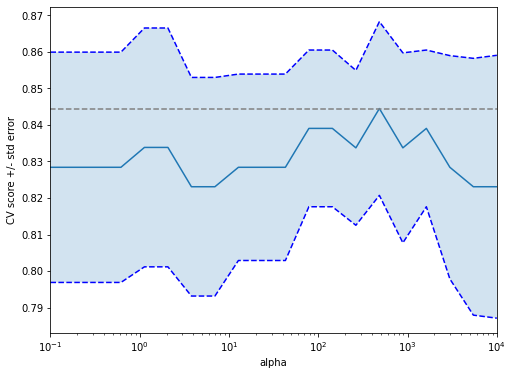

In [15]:
from models import RandomForest
from models import LGBM
from models import LinearModel

# random forest
rf_model = RandomForest('RF',  {})
best_params = rf_model.random_search(4, norm_X_train, y_train)
rf_model = RandomForest('RF', best_params)
rf_model.run_cv(norm_X_train, y_train, 4)

# LGBM
lgbm_model = LGBM('LGBM', {'n_jobs': -1})
best_params = lgbm_model.random_search(4, norm_X_train, y_train)
lgbm_model = LGBM('LGBM', best_params)
lgbm_model.run_cv(norm_X_train, y_train, 4)

# lasso
lasso = LinearModel('lasso', {'penalty' : 'l1', 'solver' : 'liblinear'})
best_params = lasso.grid_search(4, norm_X_train, y_train, visualize=False)
lasso = LinearModel('lasso', dict({'penalty' : 'l1', 'solver' : 'liblinear'}, **best_params))
lasso.run_cv(norm_X_train, y_train, 4)

# logistic
logistic = LinearModel('logistic', {'solver' : 'lbfgs'})
best_params = logistic.grid_search(4, norm_X_train, y_train, visualize=True)
logistic = LinearModel('logistic', dict({'solver' : 'lbfgs'}, **best_params))
logistic.run_cv(norm_X_train, y_train, 4)

# Get Predictions on Test Set

In [16]:
output = {}
all_models = [rf_model, lgbm_model, lasso, logistic]
for model in all_models:
    print(model.model_name)
    y_train_prob = model.avgd_folds_decision_function(norm_X_train)
    print(np.sum(np.isnan(norm_X_test)))
    y_pred_prob = model.avgd_folds_decision_function(norm_X_test)
    
    
        
    # get best threshold
    # Average acr
    best_threshold = utils.get_optimal_threshold(y_train, y_train_prob)    
    
    output[model.model_name] = {'model': model, 'best_threshold': best_threshold,'y_pred_prob': y_pred_prob, 'y_test': y_test}
                    

RF
0
LGBM
0
lasso
0
logistic
0


In [17]:
import pickle
with open('model_output_v3.pkl', 'wb') as f:
    pickle.dump(output, f)

# Load Model Data, Find Operating Points
- Two Operating Points: 
    - High senstivity (TPR > .9)
    - Maximize TPR + (1 - FPR)

In [18]:
import pickle 
from sklearn.metrics import roc_auc_score, confusion_matrix

In [19]:
with open('model_output_v3.pkl', 'rb') as f:
    output = pickle.load(f)

In [20]:
def get_optimal_operating_point(y_true, y_pred):
    thresholds = []
    sens_plus_spec = []
    for threshold in np.arange(0, 1, .01):
        preds = [1 if p > threshold else 0 for p in y_pred]
        tn, fp, fn, tp = confusion_matrix(y_true, preds).ravel()
        specificity = tn / (tn + fp)
        sensitivity = tp / (tp + fn)
        thresholds.append(threshold)
        sens_plus_spec.append(sensitivity + specificity)
    max_idx = np.argmax(sens_plus_spec)
    return thresholds[max_idx]

In [21]:
def get_high_sensitivity_operating_point(y_true, y_pred, target=.9):
    thresholds = []
    sensitivities = []
    for threshold in np.arange(0, 1, .01):
        preds = [1 if p > threshold else 0 for p in y_pred]
        tn, fp, fn ,tp = confusion_matrix(y_true, preds).ravel()
        sensitivity = tp / (tp + fn)
        thresholds.append(threshold)
        sensitivities.append(sensitivity)
        
    for idx, s in enumerate(sensitivities):
        if s <= target:
            return thresholds[idx-1]

In [22]:
for model_name, data in output.items():
    model = data['model']

    y_fold_preds = model.cv_storage.y_pred
    y_validations = model.cv_storage.y_test  
    
    optimal_thresholds = []
    high_sens_thresholds = []
    for y_pred, y_val in zip(y_fold_preds, y_validations):
        optimal_thresholds.append(get_optimal_operating_point(y_val, y_pred))
        high_sens_thresholds.append(get_high_sensitivity_operating_point(y_val, y_pred))
        
    print(model_name)
    print("High Sensitivity Thresholds:")
    print(high_sens_thresholds)
    print("Optimal Thresholds:")
    print(optimal_thresholds)
    print()
    output[model_name]['high_sensitivity_threshold'] = np.mean(high_sens_thresholds)
    output[model_name]['optimal_thresholds'] = np.mean(optimal_thresholds)

RF
High Sensitivity Thresholds:
[0.35000000000000003, 0.44, 0.49, 0.53]
Optimal Thresholds:
[0.5700000000000001, 0.6, 0.46, 0.53]

LGBM
High Sensitivity Thresholds:
[0.0, 0.12, 0.67, 0.52]
Optimal Thresholds:
[0.08, 0.36, 0.47000000000000003, 0.29]

lasso
High Sensitivity Thresholds:
[0.0, 0.89, 0.18, 0.02]
Optimal Thresholds:
[0.8200000000000001, 0.68, 0.12, 0.88]

logistic
High Sensitivity Thresholds:
[0.0, 0.29, 0.07, 0.38]
Optimal Thresholds:
[0.08, 0.13, 0.01, 0.27]



# Plot all predictions

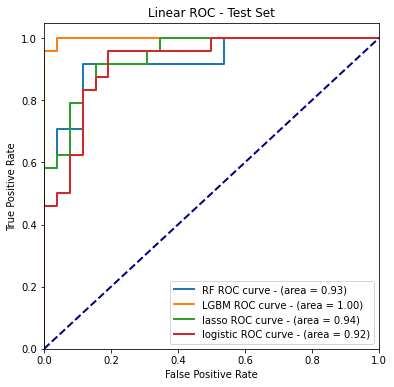

In [24]:
plt.figure(figsize=(6,6))

for model_name, data in output.items():
    model = data['model']
    y_test = data['y_test']
    y_pred_prob = data['y_pred_prob']
    fpr, tpr, a = model.get_prediction_stats(y_test, y_pred_prob)
    plt.plot(fpr, tpr, lw=2, label=model_name + ' ROC curve - (area = %0.2f)' % a)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Linear ROC - Test Set')
plt.legend(loc="lower right")
plt.show()

# Compute AUC and CI using Delong's Method

In [25]:
for model_name, data in output.items():
    print(model_name)
    y_test = data['y_test']
    y_pred_prob = data['y_pred_prob']
    model = data['model']
    fpr, tpr, auc = model.get_prediction_stats(y_test, y_pred_prob)
    print(delong.compute_stats(.95, y_pred_prob, y_test))
    print()

RF
AUC: 0.9262820512820513
AUC COV: 0.0013718627619129292
95% AUC CI: [0.8536876 0.9988765]
[0.8536876 0.9988765]

LGBM
AUC: 0.9983974358974359
AUC COV: 5.136423405654168e-06
95% AUC CI: [0.99395544 1.        ]
[0.99395544 1.        ]

lasso
AUC: 0.9407051282051282
AUC COV: 0.0008888692364862937
95% AUC CI: [0.88227094 0.99913932]
[0.88227094 0.99913932]

logistic
AUC: 0.921474358974359
AUC COV: 0.0014109442443472546
95% AUC CI: [0.84785314 0.99509558]
[0.84785314 0.99509558]



# Compute Sensitivity and Specificity and CI using Wilson's Method

In [26]:
import math

def binconf(p, n, c=0.95):
    '''
    Calculate binomial confidence interval based on the number of positive and
    negative events observed.  Uses Wilson score and approximations to inverse
    of normal cumulative density function.

    Parameters
    ----------
    p: int
      number of positive events observed
    n: int
      number of negative events observed
    c : optional, [0,1]
      confidence percentage. e.g. 0.95 means 95% confident the probability of
      success lies between the 2 returned values

    Returns
    -------
    theta_low  : float
      lower bound on confidence interval
    theta_high : float
      upper bound on confidence interval
    '''
    p, n = float(p), float(n)
    N    = p + n

    if N == 0.0: return (0.0, 1.0)

    p = p / N
    z = normcdfi(1 - 0.5 * (1-c))

    a1 = 1.0 / (1.0 + z * z / N)
    a2 = p + z * z / (2 * N)
    a3 = z * math.sqrt(p * (1-p) / N + z * z / (4 * N * N))

    return (a1 * (a2 - a3), a1 * (a2 + a3))


def erfi(x):
    """Approximation to inverse error function"""
    a  = 0.147  # MAGIC!!!
    a1 = math.log(1 - x * x)
    a2 = (
    2.0 / (math.pi * a)
    + a1 / 2.0
    )

    return (
    sign(x) *
    math.sqrt( math.sqrt(a2 * a2 - a1 / a) - a2 )
    )


def sign(x):
    if x  < 0: return -1
    if x == 0: return  0
    if x  > 0: return  1


def normcdfi(p, mu=0.0, sigma2=1.0):
    """Inverse CDF of normal distribution"""
    if mu == 0.0 and sigma2 == 1.0:
        return math.sqrt(2) * erfi(2 * p - 1)
    else:
        return mu + math.sqrt(sigma2) * normcdfi(p)

# Compute for High Sensitivity Threshold

In [27]:
from sklearn.metrics import confusion_matrix

for model_name, data in output.items():
    threshold = data['high_sensitivity_threshold']
    preds = [1 if i>threshold else 0 for i in data['y_pred_prob']]
    y_test = data['y_test']
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    print(model_name)
    print('    Sensitivity: {:10.4f}'.format(tp / (tp + fn)))
    print('    Sensitivity 95% CI: ', binconf(tp, fn))
    print('    Specificity:        {:10.4f}'.format(tn / (tn + fp)))
    print('    Specificity 95% CI: ', binconf(tn, fp))
    print()
    print(confusion_matrix(y_test, preds))
    print()

RF
    Sensitivity:     0.8750
    Sensitivity 95% CI:  (0.6900645596725103, 0.9565365713514448)
    Specificity:            0.8846
    Specificity 95% CI:  (0.7103400196232628, 0.9599490513578658)

[[23  3]
 [ 3 21]]

LGBM
    Sensitivity:     1.0000
    Sensitivity 95% CI:  (0.8621348413652735, 1.0000000000000002)
    Specificity:            0.9615
    Specificity 95% CI:  (0.811173344287871, 0.9931735408894832)

[[25  1]
 [ 0 24]]

lasso
    Sensitivity:     0.8750
    Sensitivity 95% CI:  (0.6900645596725103, 0.9565365713514448)
    Specificity:            0.8462
    Specificity 95% CI:  (0.664785844637114, 0.9384743192459015)

[[22  4]
 [ 3 21]]

logistic
    Sensitivity:     0.9583
    Sensitivity 95% CI:  (0.7976885775828355, 0.9926016936686651)
    Specificity:            0.8077
    Specificity 95% CI:  (0.6213337300160995, 0.9148975267688034)

[[21  5]
 [ 1 23]]



# Compute for Optimal (Sens + (1 - FPR)) Threshold

In [28]:
from sklearn.metrics import confusion_matrix

for model_name, data in output.items():
    threshold = data['optimal_thresholds']
    preds = [1 if i>threshold else 0 for i in data['y_pred_prob']]
    y_test = data['y_test']
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    print(model_name)
    print('    Sensitivity: {:10.4f}'.format(tp / (tp + fn)))
    print('    Sensitivity 95% CI: ', binconf(tp, fn))
    print('    Specificity:        {:10.4f}'.format(tn / (tn + fp)))
    print('    Specificity 95% CI: ', binconf(tn, fp))
    print()
    print(confusion_matrix(y_test, preds))
    print()

RF
    Sensitivity:     0.6667
    Sensitivity 95% CI:  (0.467153963449407, 0.820224317005684)
    Specificity:            0.9615
    Specificity 95% CI:  (0.811173344287871, 0.9931735408894832)

[[25  1]
 [ 8 16]]

LGBM
    Sensitivity:     1.0000
    Sensitivity 95% CI:  (0.8621348413652735, 1.0000000000000002)
    Specificity:            0.9615
    Specificity 95% CI:  (0.811173344287871, 0.9931735408894832)

[[25  1]
 [ 0 24]]

lasso
    Sensitivity:     0.7500
    Sensitivity 95% CI:  (0.5511024409098402, 0.8799649797727965)
    Specificity:            0.9231
    Specificity 95% CI:  (0.7586844857067275, 0.978633492372514)

[[24  2]
 [ 6 18]]

logistic
    Sensitivity:     0.9583
    Sensitivity 95% CI:  (0.7976885775828355, 0.9926016936686651)
    Specificity:            0.8077
    Specificity 95% CI:  (0.6213337300160995, 0.9148975267688034)

[[21  5]
 [ 1 23]]

